# Trial

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Correlation testing + heatmaps

In [3]:
df = pd.read_csv("allyear.csv")

In [4]:
df.drop(['county'],axis=1,inplace=True)
df.reset_index()
df

,population,unemployedRate,povertyRate,medianIncome,avgmealmon,homeless,pplweekmon,drivealone,carpooled,publicTrans,walked,meanHouseIncome,yeshealth,privatehealth,publichealth,nohealth,POP_SNAP
0,263670,4.875,0.111,63389,3.43,357,62.840,100267,9897,4174,5923,93192,238684,167592,106540,22656,32072
1,932202,3.425,0.056,108827,4.00,271,45.530,323546,31853,82264,10764,147611,862372,706314,247591,64289,30301
2,445349,3.175,0.055,88797,3.49,518,39.550,185678,18855,6989,1733,114940,407683,345164,125525,19669,19123
3,506471,3.900,0.107,73672,3.58,603,58.000,188830,24875,15967,3665,100804,468706,344865,186648,32088,59120
4,92039,7.283,0.088,69980,3.71,90,72.600,32620,4167,232,2625,98993,83788,61367,40763,6102,6712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,63732,7.258,0.114,68830,3.53,38,86.770,24202,2597,201,466,88766,59606,45104,23619,3332,9325
101,329626,4.508,0.052,98440,3.41,342,43.307,134577,12021,8140,3684,132892,311777,274229,71082,18776,12874
102,143004,5.367,0.048,85086,3.58,57,50.034,64944,4956,1040,1145,109179,136333,115072,38680,6468,4735
103,549905,5.975,0.106,71163,3.02,504,54.202,177773,22037,34254,8130,102929,481160,361658,165957,69732,49795


In [5]:
corr = df.corr()
corr

,population,unemployedRate,povertyRate,medianIncome,avgmealmon,homeless,pplweekmon,drivealone,carpooled,publicTrans,walked,meanHouseIncome,yeshealth,privatehealth,publichealth,nohealth,POP_SNAP
population,1.000000,-0.263586,0.090570,0.084500,-0.019133,0.591383,-0.050700,0.945830,0.942731,0.674527,0.686380,0.224894,0.998130,0.975020,0.940448,0.861809,0.660805
unemployedRate,-0.263586,1.000000,0.500398,-0.681562,-0.194684,-0.025236,0.662080,-0.317279,-0.263877,-0.138395,-0.087871,-0.670894,-0.279376,-0.326512,-0.146743,-0.078733,0.096361
povertyRate,0.090570,0.500398,1.000000,-0.848366,-0.287375,0.384512,0.690082,-0.112686,0.162925,0.318465,0.401652,-0.749107,0.047779,-0.089406,0.310709,0.415315,0.674003
medianIncome,0.084500,-0.681562,-0.848366,1.000000,0.332101,-0.266453,-0.773294,0.237963,0.041811,-0.091909,-0.164310,0.950289,0.118544,0.237254,-0.157232,-0.193366,-0.475714
avgmealmon,-0.019133,-0.194684,-0.287375,0.332101,1.000000,0.108051,0.124277,-0.007948,-0.113825,0.026737,-0.060991,0.416164,-0.017426,-0.002830,-0.065868,-0.028130,-0.138293
homeless,0.591383,-0.025236,0.384512,-0.266453,0.108051,1.000000,0.453408,0.449822,0.523188,0.569306,0.581056,-0.064108,0.562882,0.473726,0.670776,0.684638,0.746321
pplweekmon,-0.050700,0.662080,0.690082,-0.773294,0.124277,0.453408,1.000000,-0.201595,-0.085880,0.165905,0.190965,-0.654971,-0.083486,-0.185484,0.128149,0.211323,0.443268
drivealone,0.945830,-0.317279,-0.112686,0.237963,-0.007948,0.449822,-0.201595,1.000000,0.892804,0.422139,0.438373,0.335013,0.959275,0.976683,0.844619,0.684538,0.463006
carpooled,0.942731,-0.263877,0.162925,0.041811,-0.113825,0.523188,-0.085880,0.892804,1.000000,0.613113,0.664018,0.160592,0.938223,0.910184,0.885444,0.839203,0.674770
publicTrans,0.674527,-0.138395,0.318465,-0.091909,0.026737,0.569306,0.165905,0.422139,0.613113,1.000000,0.947683,0.068612,0.645294,0.573866,0.652674,0.831374,0.679789


<AxesSubplot:>

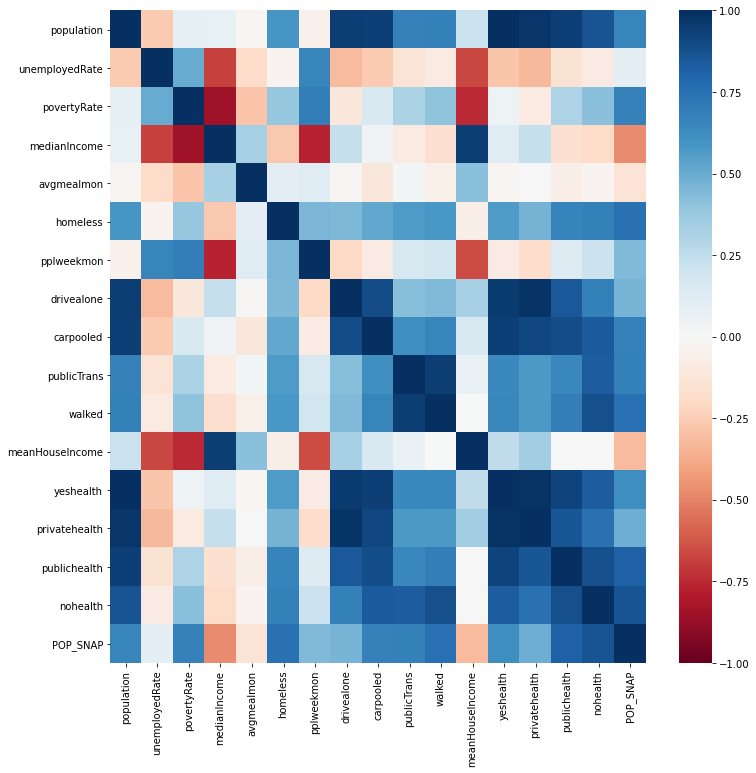

In [6]:
plt.figure(figsize=(12, 12))
# plot the correlation heatmap
#sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu')

# metric cutoff testing

In [7]:
array = ['population','unemployedRate','povertyRate','medianIncome','avgmealmon','homeless','pplweekmon','drivealone','carpooled','publicTrans','walked','meanHouseIncome','yeshealth','privatehealth','publichealth','nohealth']
combos=[]
opvars = []
removed = []

x=0
for i in array[x:]:
    for j in array[x+1:]:
        column_1 = df[i]
        column_2 = df[j]
        combos.append((i,j))
    x=x+1

for i in combos:
    c1=df[i[0]]
    c2=df[i[1]]
    corr = abs(c1.corr(c2))
    if corr > 0.95:
        snapcol = df['POP_SNAP']
        corr_snap1 = abs(c1.corr(snapcol))
        corr_snap2 = abs(c2.corr(snapcol))
        if (corr_snap2>corr_snap1 and i[1] not in opvars):
            if (i[0] not in opvars):
                opvars.append(i[1])
            else:
                index = opvars.index(i[0])
                opvars[index] = i[1]
        elif (corr_snap1>corr_snap2 and i[0] not in opvars):
            if (i[1] not in opvars):
                opvars.append(i[0])
            else:
                index = opvars.index(i[1])
                opvars[index] = i[0]

print(opvars)

['population', 'medianIncome', 'yeshealth', 'privatehealth']


In [1]:
opvars = ['population', 'privatehealth', 'medianIncome', 'yeshealth']
opvars.append('POP_SNAP')


## Developing metric using multiple linear regression

In [9]:
df = df[opvars]

In [10]:
df

,population,privatehealth,medianIncome,yeshealth,POP_SNAP
0,263670,167592,63389,238684,32072
1,932202,706314,108827,862372,30301
2,445349,345164,88797,407683,19123
3,506471,344865,73672,468706,59120
4,92039,61367,69980,83788,6712
...,...,...,...,...,...
100,63732,45104,68830,59606,9325
101,329626,274229,98440,311777,12874
102,143004,115072,85086,136333,4735
103,549905,361658,71163,481160,49795


## training model

In [13]:
x = df.drop(['POP_SNAP'],axis=1).values
y = df['POP_SNAP'].values

In [14]:
# splitting dataset into training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [15]:
# training model on training set
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [16]:
# predict test set results
y_pred=ml.predict(x_test)
print(y_pred)

[ 27459.63562452  64074.35811639  22155.60787739   8208.32617773
  46055.65414244 113199.65662655   9227.95067198   8896.11767879
  61790.84836083  51047.89298263  55361.02166441   8140.63823917
   2142.21481583  12901.9185775   15065.34675507   2692.46224935
  46894.89104889  57006.24368306  20713.83593995  97207.50303883
  52818.00292852  32056.3979001   57290.46677182  40255.82331837
  61647.09629222  27934.86998183 121260.02522064  21665.36415923
  34958.42051139   9096.82573847  35817.08435664  62235.3956098 ]


In [17]:
# testing one value
#ml.predict([[106540,22656,5923]])

Text(0.5, 1.0, 'Actual vs Predicted')

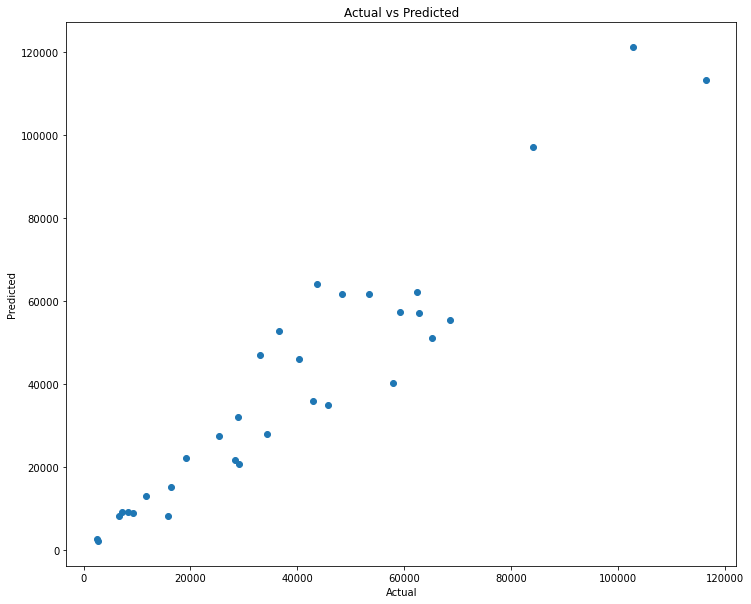

In [18]:
# scatterplot of results
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [19]:
# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     359.8
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.06e-58
Time:                        21:28:17   Log-Likelihood:                -1097.4
No. Observations:                 105   AIC:                             2205.
Df Residuals:                     100   BIC:                             2218.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.163e+04   5382.396      2.161      0.0

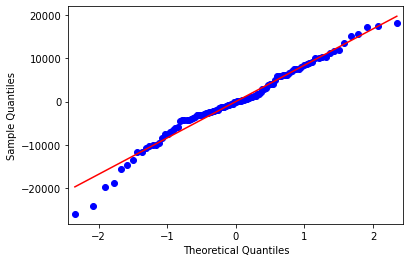

The mean of the residuals is 4.241e-11


In [20]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

## testing 2020 values to predict SNAP data

In [21]:
df20 = pd.read_csv('mod4-2020.csv')
df20

,county,population,privatehealth,medianIncome,yeshealth,POP_SNAP,snapPred20
0,ATLANTIC,262945,171307,37802,281052,33493,NaN
1,BERGEN,930394,718702,52631,860045,31748,NaN
2,BURLINGTON,446596,349689,55674,413360,19921,NaN
3,CAMDEN,506809,347707,52960,469026,65111,NaN
4,CAPE MAY,91546,63816,50654,84443,7226,NaN
5,CUMBERLAND,147008,84805,47798,125890,24564,NaN
6,ESSEX,800501,486651,25148,701519,108978,NaN
7,GLOUCESTER,293245,231496,63171,279835,16514,NaN
8,HUDSON,671666,404398,12085,584415,96196,NaN
9,HUNTERDON,124797,103338,83300,117733,2713,NaN


In [22]:
pred20=[]
for index, row in df20.iterrows():
    pred = int(ml.predict([[row['population'], row['privatehealth'], row['medianIncome'], row['yeshealth']]]))
    pred20.append(pred)
print(pred20)

[47045, 49983, 22988, 56891, 12894, 27328, 119542, 16747, 103452, 4450, 29872, 47203, 25157, 12187, 64807, 90595, 9032, 9200, 5310, 62658, 8809]


In [23]:
predequation = []
for index, row in df20.iterrows():
    equation = int(11630-4672+0.1360*row['population']-0.6704*row['privatehealth']-0.1119*row['medianIncome']+0.4657*row['yeshealth'])
    predequation.append(equation)
print(predequation)

[54530, 46307, 19535, 55280, 10282, 23376, 113458, 14894, 98005, 159, 25827, 43071, 23387, 9562, 66361, 87011, 5994, 6117, 3284, 56058, 6281]


In [24]:
snap20 =[]
for i in df20['POP_SNAP']:
    snap20.append(i)

In [25]:
errors=[]
j=0
while j<len(pred20):
    err = abs((pred20[j]-snap20[j])/snap20[j])
    errors.append(err)
    j=j+1
avgerr = sum(errors)/len(errors)
print(avgerr)

0.2330903118763097


In [26]:
residuals = []
k=0
while k<len(pred20):
    residual = snap20[k]-pred20[k]
    residuals.append(residual)
    k=k+1
avgres = sum(residuals)/len(pred20)
print(avgres)

-4672.619047619048


In [27]:
df20['snapPred20'] = pred20
df20

,county,population,privatehealth,medianIncome,yeshealth,POP_SNAP,snapPred20
0,ATLANTIC,262945,171307,37802,281052,33493,47045
1,BERGEN,930394,718702,52631,860045,31748,49983
2,BURLINGTON,446596,349689,55674,413360,19921,22988
3,CAMDEN,506809,347707,52960,469026,65111,56891
4,CAPE MAY,91546,63816,50654,84443,7226,12894
5,CUMBERLAND,147008,84805,47798,125890,24564,27328
6,ESSEX,800501,486651,25148,701519,108978,119542
7,GLOUCESTER,293245,231496,63171,279835,16514,16747
8,HUDSON,671666,404398,12085,584415,96196,103452
9,HUNTERDON,124797,103338,83300,117733,2713,4450


## bar graph pred vs actual 2020 SNAP

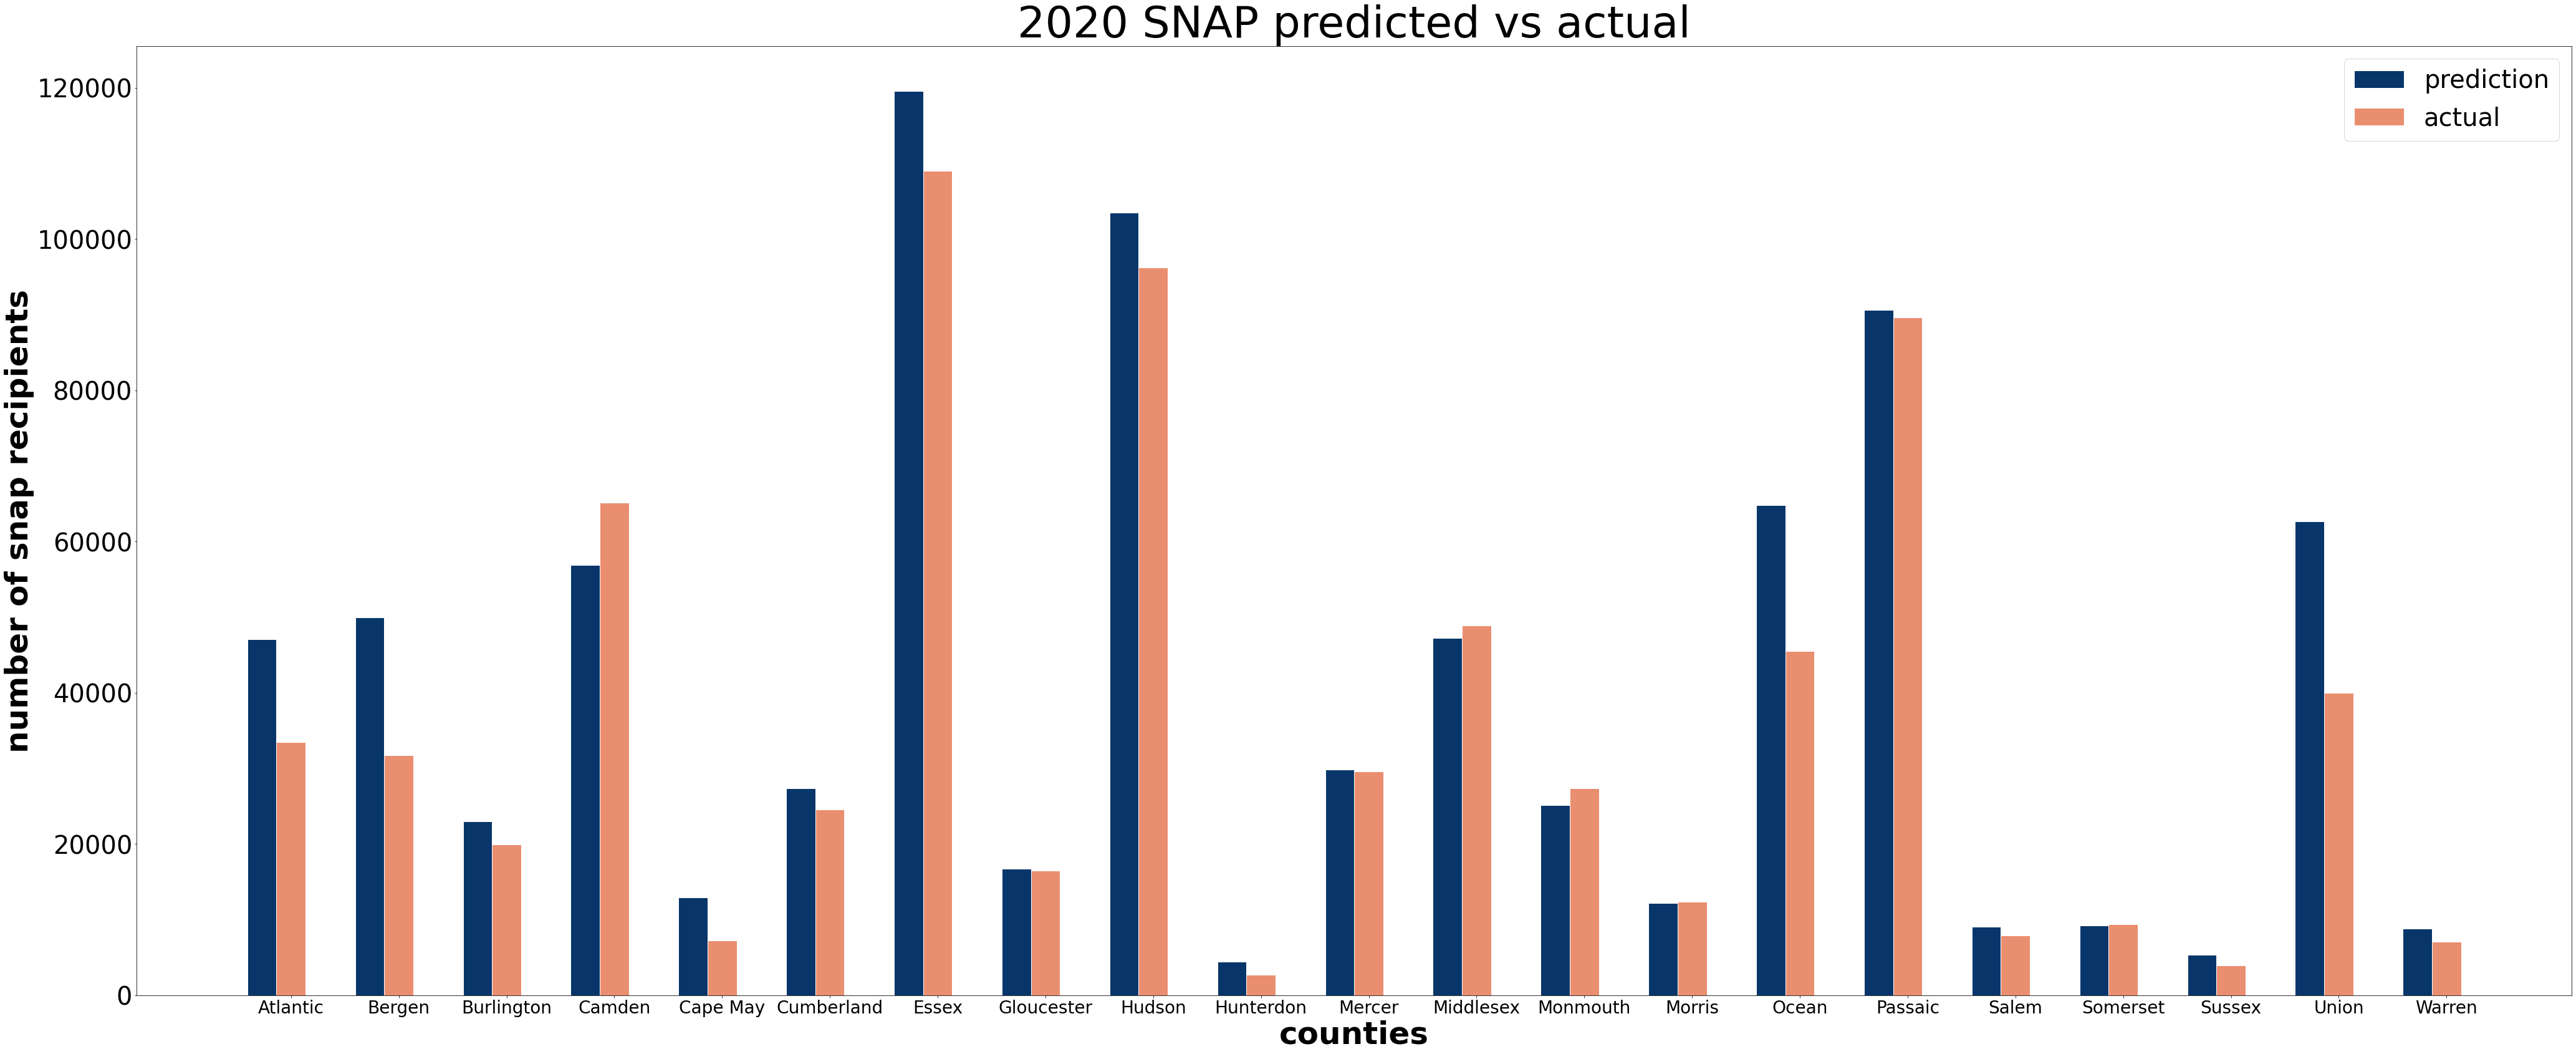

In [47]:
# set width of bars
plt.figure(figsize=(70, 28))
barWidth = 0.27
 
#Set position of bar on X axis
r1 = np.arange(len(pred20))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, pred20, color='#08366A', width=barWidth, edgecolor='white', label='prediction')
plt.bar(r2, snap20, color='#EA8E70', width=barWidth, edgecolor='white', label='actual')
 
# Add xticks on the middle of the group bars
plt.ylabel('number of snap recipients', fontweight='bold', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('counties', fontweight='bold', fontsize=50)
plt.xticks([r + barWidth for r in range(len(pred20))], ['Atlantic', 'Bergen', 'Burlington','Camden','Cape May',
                                                       'Cumberland','Essex','Gloucester','Hudson','Hunterdon',
                                                       'Mercer','Middlesex','Monmouth','Morris','Ocean','Passaic',
                                                       'Salem','Somerset','Sussex','Union','Warren'], fontsize=20)
plt.xticks(fontsize=28)
# Create legend & Show graphic
plt.legend(fontsize=40)
plt.title('2020 SNAP predicted vs actual', fontsize=70)
plt.show()

## testing 2021 data to predict SNAP data

In [29]:
df21 = pd.read_csv('mod4-2021.csv')
df21

,county,pop2021,privatehealth,medianIncome,yeshealth,POP_SNAP,snapPred21
0,ATLANTIC,263032,171382,50214,239926,39938,NaN
1,BERGEN,930974,718754,71549,860312,36545,NaN
2,BURLINGTON,446557,349673,68545,413314,22424,NaN
3,CAMDEN,506707,347373,59244,468879,73810,NaN
4,CAPE MAY,91225,63327,58461,84215,8207,NaN
5,CUMBERLAND,147311,84685,49631,125948,27583,NaN
6,ESSEX,799785,485632,36974,700450,128748,NaN
7,GLOUCESTER,291858,230123,71953,278030,17857,NaN
8,HUDSON,673311,405160,33000,585750,114779,NaN
9,HUNTERDON,123499,101488,94942,117707,3031,NaN


In [30]:
pred21=[]
for index, row in df21.iterrows():
    pred = int(ml.predict([[row['pop2021'], row['privatehealth'], row['medianIncome'], row['yeshealth']]]))
    pred21.append(pred)
print(pred21)

[36483, 49085, 22217, 56665, 12588, 27406, 119008, 16228, 102580, 4518, 28096, 47023, 23027, 12279, 64413, 89061, 8435, 7930, 4232, 62157, 7405]


In [31]:
snap21 =[]
for i in df21['POP_SNAP']:
    snap21.append(i)

In [32]:
errors=[]
j=0
while j<len(pred21):
    err = abs((pred21[j]-snap21[j])/snap21[j])
    errors.append(err)
    j=j+1
avgerr = sum(errors)/len(errors)
print(avgerr)

0.17352388871593402


In [33]:
df21['snapPred21'] = pred21
df21

,county,pop2021,privatehealth,medianIncome,yeshealth,POP_SNAP,snapPred21
0,ATLANTIC,263032,171382,50214,239926,39938,36483
1,BERGEN,930974,718754,71549,860312,36545,49085
2,BURLINGTON,446557,349673,68545,413314,22424,22217
3,CAMDEN,506707,347373,59244,468879,73810,56665
4,CAPE MAY,91225,63327,58461,84215,8207,12588
5,CUMBERLAND,147311,84685,49631,125948,27583,27406
6,ESSEX,799785,485632,36974,700450,128748,119008
7,GLOUCESTER,291858,230123,71953,278030,17857,16228
8,HUDSON,673311,405160,33000,585750,114779,102580
9,HUNTERDON,123499,101488,94942,117707,3031,4518


In [34]:
pop21 =[]
for i in df21['pop2021']:
    pop21.append(i)

In [36]:
percent = []
for m in range(len(pop21)):
    percent.append((snap21[m]/pop21[m])*100)
    
df21['percent'] = percent
df21

,county,pop2021,privatehealth,medianIncome,yeshealth,POP_SNAP,snapPred21,percent
0,ATLANTIC,263032,171382,50214,239926,39938,36483,15.183704
1,BERGEN,930974,718754,71549,860312,36545,49085,3.925459
2,BURLINGTON,446557,349673,68545,413314,22424,22217,5.021531
3,CAMDEN,506707,347373,59244,468879,73810,56665,14.566604
4,CAPE MAY,91225,63327,58461,84215,8207,12588,8.996437
5,CUMBERLAND,147311,84685,49631,125948,27583,27406,18.724332
6,ESSEX,799785,485632,36974,700450,128748,119008,16.097826
7,GLOUCESTER,291858,230123,71953,278030,17857,16228,6.118386
8,HUDSON,673311,405160,33000,585750,114779,102580,17.046952
9,HUNTERDON,123499,101488,94942,117707,3031,4518,2.454271


# Cloropleth Map of 2021 data using GeoPandas and Matplotlib

In [37]:
# racial demographics per county
import geopandas as gpd
df21.head()

,county,pop2021,privatehealth,medianIncome,yeshealth,POP_SNAP,snapPred21,percent
0,ATLANTIC,263032,171382,50214,239926,39938,36483,15.183704
1,BERGEN,930974,718754,71549,860312,36545,49085,3.925459
2,BURLINGTON,446557,349673,68545,413314,22424,22217,5.021531
3,CAMDEN,506707,347373,59244,468879,73810,56665,14.566604
4,CAPE MAY,91225,63327,58461,84215,8207,12588,8.996437


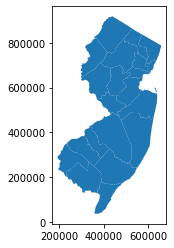

In [38]:
file_path = 'County_Boundaries/County_Boundaries_of_NJ.shp'
map_df = gpd.read_file(file_path)
map_df.plot();

In [39]:
race = pd.read_csv('race19.csv')
race

,county,white,black,hisp-lat,asian,nathaw-pacisl,natam,twoplus
0,ATLANTIC,56.0,17.1,19.4,8.1,0.1,0.7,2.7
1,BERGEN,55.1,7.4,21.0,17.0,0.1,0.5,2.2
2,BURLINGTON,66.6,18.3,8.5,5.4,0.1,0.3,3.0
3,CAMDEN,55.8,21.6,17.6,6.0,0.1,0.7,2.6
4,CAPE MAY,85.0,4.8,8.1,1.0,0.1,0.4,1.9
5,CUMBERLAND,45.4,21.9,31.8,1.4,0.2,1.6,3.1
6,ESSEX,30.2,41.9,23.8,5.9,0.1,0.8,2.4
7,GLOUCESTER,77.8,11.2,6.7,3.1,0.1,0.3,2.3
8,HUDSON,29.0,14.8,42.7,16.4,0.2,1.1,2.7
9,HUNTERDON,84.8,2.7,7.0,4.4,0.2,0.2,1.5


In [40]:
merged = map_df.set_index('COUNTY').join(race.set_index('county'))
merged.head()

,OBJECTID,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,Shape_Leng,Shape_Area,geometry,white,black,hisp-lat,asian,nathaw-pacisl,natam,twoplus
COUNTY,,,,,,,,,,,,,,,,,,,,,
ATLANTIC,1,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31...",56.0,17.1,19.4,8.1,0.1,0.7,2.7
BERGEN,2,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",55.1,7.4,21.0,17.0,0.1,0.5,2.2
BURLINGTON,3,Burlington County,BUR,County of Burlington,882272,34005,5,524903.339615,820.161468,448734,...,788705.269533,2.286470e+10,"POLYGON ((436626.690 491361.780, 436701.190 49...",66.6,18.3,8.5,5.4,0.1,0.3,3.0
CAMDEN,4,Camden County,CAM,County of Camden,882273,34007,7,145598.488079,227.497638,513657,...,494949.424444,6.342245e+09,"POLYGON ((342763.990 423475.830, 342804.100 42...",55.8,21.6,17.6,6.0,0.1,0.7,2.6
CAPE MAY,5,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17...",85.0,4.8,8.1,1.0,0.1,0.4,1.9


In [41]:
merged['percent'] = percent
counties = ['Atlantic', 'Bergen', 'Burlington','Camden','Cape May','Cumberland','Essex','Gloucester','Hudson','Hunterdon','Mercer','Monmouth','Ocean','Passaic','Salem','Somerset','Sussex','Union','Warren','Morris','Middlesex']
merged['counties'] = counties
merged

,OBJECTID,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,geometry,white,black,hisp-lat,asian,nathaw-pacisl,natam,twoplus,percent,counties
COUNTY,,,,,,,,,,,,,,,,,,,,,
ATLANTIC,1,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,"POLYGON ((443056.010 311529.770, 443068.440 31...",56.0,17.1,19.4,8.1,0.1,0.7,2.7,15.183704,Atlantic
BERGEN,2,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,"POLYGON ((656200.963 783614.366, 656141.127 78...",55.1,7.4,21.0,17.0,0.1,0.5,2.2,3.925459,Bergen
BURLINGTON,3,Burlington County,BUR,County of Burlington,882272,34005,5,524903.339615,820.161468,448734,...,"POLYGON ((436626.690 491361.780, 436701.190 49...",66.6,18.3,8.5,5.4,0.1,0.3,3.0,5.021531,Burlington
CAMDEN,4,Camden County,CAM,County of Camden,882273,34007,7,145598.488079,227.497638,513657,...,"POLYGON ((342763.990 423475.830, 342804.100 42...",55.8,21.6,17.6,6.0,0.1,0.7,2.6,14.566604,Camden
CAPE MAY,5,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,"POLYGON ((390389.730 177065.130, 390410.170 17...",85.0,4.8,8.1,1.0,0.1,0.4,1.9,8.996437,Cape May
CUMBERLAND,6,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,"POLYGON ((333743.882 268331.623, 341456.371 26...",45.4,21.9,31.8,1.4,0.2,1.6,3.1,18.724332,Cumberland
ESSEX,7,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,"POLYGON ((541167.940 755990.810, 541175.500 75...",30.2,41.9,23.8,5.9,0.1,0.8,2.4,16.097826,Essex
GLOUCESTER,8,Gloucester County,GLO,County of Gloucester,882277,34015,15,215073.163717,336.051818,288288,...,"POLYGON ((315738.780 382812.540, 315792.600 38...",77.8,11.2,6.7,3.1,0.1,0.3,2.3,6.118386,Gloucester
HUDSON,9,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400795,51.535001,634266,...,"MULTIPOLYGON (((586210.281 660143.720, 586222....",29.0,14.8,42.7,16.4,0.2,1.1,2.7,17.046952,Hudson


In [42]:
merged['percent']

COUNTY
ATLANTIC      15.183704
BERGEN         3.925459
BURLINGTON     5.021531
CAMDEN        14.566604
CAPE MAY       8.996437
CUMBERLAND    18.724332
ESSEX         16.097826
GLOUCESTER     6.118386
HUDSON        17.046952
HUNTERDON      2.454271
MERCER         9.363129
MONMOUTH       6.661546
OCEAN          5.012291
PASSAIC        2.837994
SALEM          8.332013
SOMERSET      18.853484
SUSSEX        13.703518
UNION          3.235817
WARREN         2.970070
MORRIS         8.635807
MIDDLESEX      7.945009
Name: percent, dtype: float64

In [256]:
merged['coords'] = merged['geometry'].apply(lambda x: x.centroid.coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

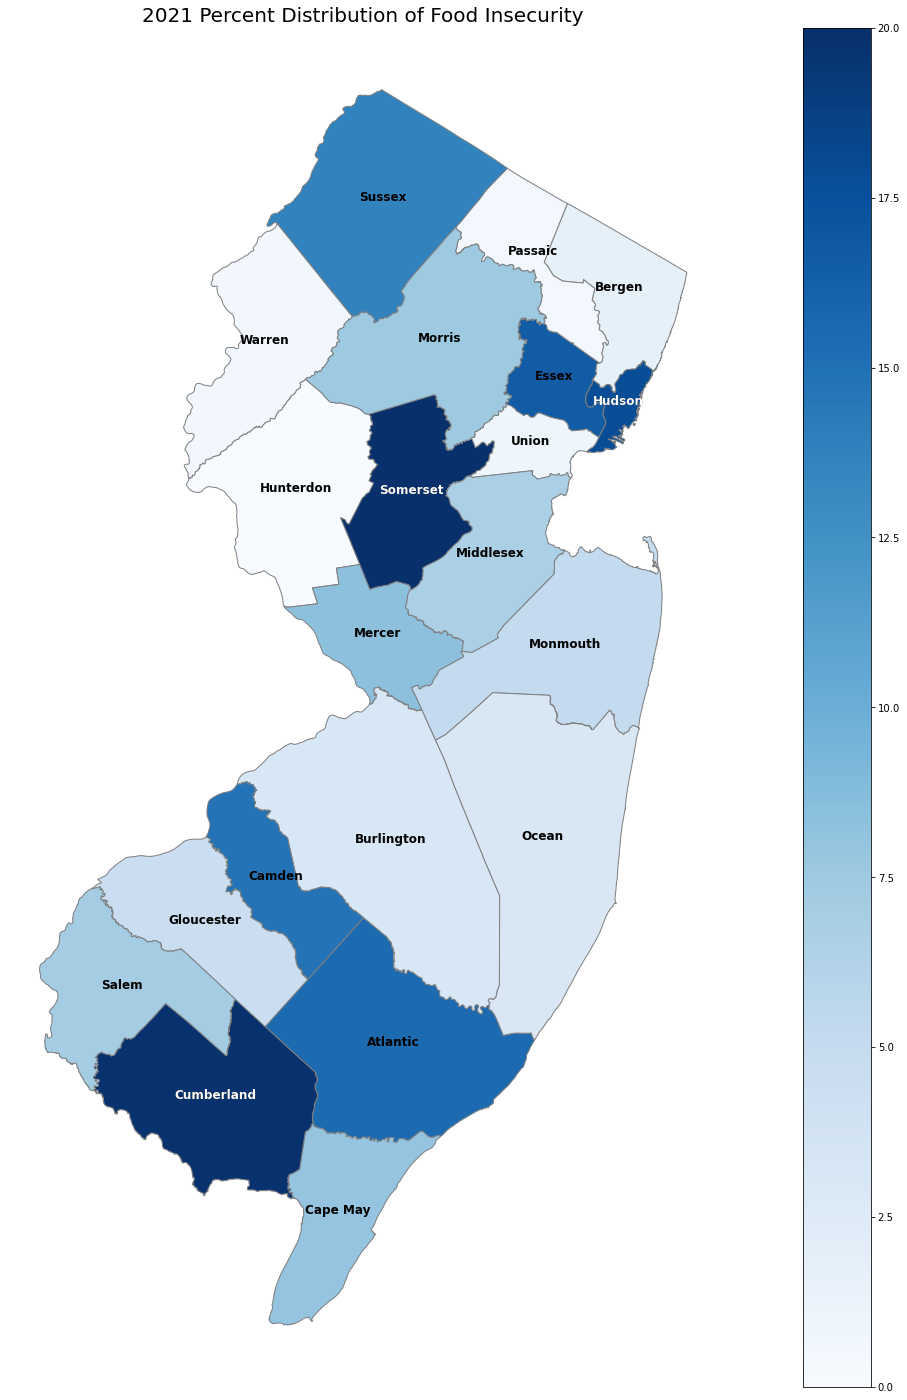

In [257]:
# selects variable/feature of the map
feature = 'percent'

# minimal and maximal values of linear colormap
vmin, vmax = 0, 20


fig, ax = plt.subplots(1, figsize=(30, 25))

# plot map with the feature, indicate customizables
merged.plot(column=feature, cmap='Blues', linewidth=1.0, ax=ax, edgecolor='0.5')
ax.set_title('2021 Percent Distribution of Food Insecurity', fontsize=20)
ax.axis('off')

# data normalization before returning RGBA colors from the given colormap
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm._A = []
cbar = fig.colorbar(sm);


#subset = merged[[merged.index['CUMBERLAND'] , merged.index['HUDSON'], merged.index['SOMERSET']]]
#merged.drop(merged.drop([merged.index['CUMBERLAND'] , merged.index['HUDSON'], merged.index['SOMERSET']]))

for _, row in merged.iterrows():
    plt.text(s=(row['counties']), x = row['coords'][0], y = row['coords'][1],
           horizontalalignment='center', fontdict = {'size': 12, 'weight':'bold'}, color='black')

for _, row in subset.iterrows():
    plt.text(s=(row['counties']), x = row['coords'][0], y = row['coords'][1],
           horizontalalignment='center', fontdict = {'size': 12, 'weight':'bold'}, color='white')

# line graph of 2015-2021 Bergen, Camden, Essex, Sussex county

In [258]:
# sample df
bergen = pd.read_csv('bergen.csv')
bergen

,year,RateUnemployed,population,privatehealth,medianIncome,yeshealth,POP_SNAP
0,2015,5.700,926391,717188,89023,853892,40208
1,2016,4.942,928120,728957,93683,864092,39891
2,2017,4.508,948406,722499,94107,868179,36628
3,2018,3.992,932816,719986,100361,859058,33014
4,2019,3.425,932202,706314,108827,862372,30301
5,2020,9.842,930394,718702,52631,860045,49983
6,2021,7.580,930974,718754,71549,860312,49085


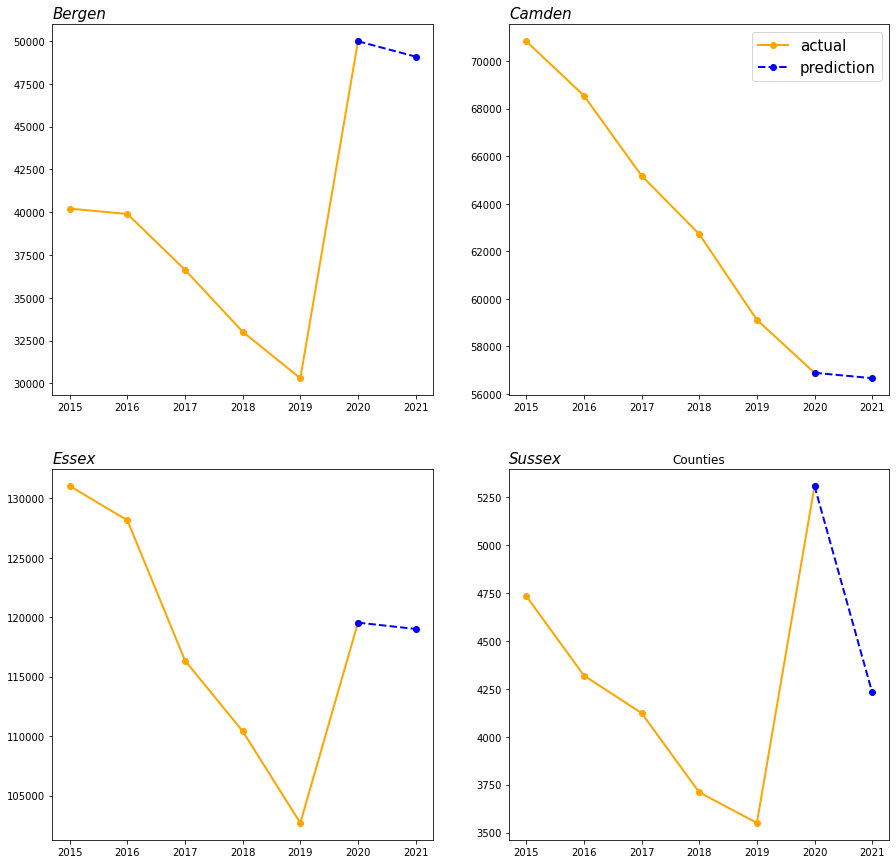

In [259]:
# reading csv files and specifying variables
bg=pd.DataFrame({'year': bergen['year'], 'snap': bergen['POP_SNAP']})

camden = pd.read_csv('camden.csv')
cm=pd.DataFrame({'year': camden['year'], 'snap': camden['POP_SNAP']})

essex = pd.read_csv('essex.csv')
ex=pd.DataFrame({'year': essex['year'], 'snap': essex['POP_SNAP']})

sussex = pd.read_csv('sussex.csv')
sx=pd.DataFrame({'year': sussex['year'], 'snap': sussex['POP_SNAP']})

# initialize a figure
plt.figure(figsize=(15, 15))
 
# do a 2x2 chart
plt.subplot(221)
plt.plot('year', 'snap', data=bg[bg['year'] <= 2020], marker='o', color='orange',linewidth=2, label='actual')
plt.plot('year', 'snap', data=bg[bg['year'] >= 2020], marker='o', color='blue', linewidth=2, linestyle = '--', label='prediction')
plt.title('Bergen', fontsize=15, loc='left', style='italic')


plt.subplot(222)
plt.plot('year', 'snap', data=cm[cm['year'] <= 2020], marker='o', color='orange',linewidth=2, label='actual')
plt.plot('year', 'snap', data=cm[cm['year'] >= 2020], marker='o', color='blue', linewidth=2, linestyle = '--', label='prediction')
plt.title('Camden', fontsize=15, loc='left', style='italic')
plt.legend(fontsize=15)

plt.subplot(223)
plt.plot('year', 'snap', data=ex[ex['year'] <= 2020], marker='o', color='orange',linewidth=2, label='actual')
plt.plot('year', 'snap', data=ex[ex['year'] >= 2020], marker='o', color='blue', linewidth=2, linestyle = '--', label='prediction')
plt.title('Essex', fontsize=15, loc='left', style='italic')


plt.subplot(224)
plt.plot('year', 'snap', data=sx[sx['year'] <= 2020], marker='o', color='orange',linewidth=2, label='actual')
plt.plot('year', 'snap', data=sx[sx['year'] >= 2020], marker='o', color='blue', linewidth=2, linestyle = '--', label='prediction')
plt.title('Sussex', fontsize=15, loc='left', style='italic')


# adding a title:
plt.title('Counties')

# showing the graph
plt.show()

# plotting race distributions in NJ

In [271]:
race = pd.read_csv('race2.csv')
race
cm = sns.light_palette('teal', as_cmap=True)

corace = race.style.background_gradient(cmap=cm, low=0, high=1, axis=0)
corace

,county,white,black,hisp-lat,asian,nathaw-pacisl,natam,twoplus
0,Atlantic,56.000000,17.100000,19.400000,8.100000,0.1,0.700000,2.700000
1,Bergen,55.100000,7.400000,21.000000,17.000000,0.1,0.500000,2.200000
2,Burlington,66.600000,18.300000,8.500000,5.400000,0.1,0.300000,3.000000
3,Camden,55.800000,21.600000,17.600000,6.000000,0.1,0.700000,2.600000
4,Cape May,85.000000,4.800000,8.100000,1.000000,0.1,0.400000,1.900000
5,Cumberland,45.400000,21.900000,31.800000,1.400000,0.2,1.600000,3.100000
6,Essex,30.200000,41.900000,23.800000,5.900000,0.1,0.800000,2.400000
7,Gloucester,77.800000,11.200000,6.700000,3.100000,0.1,0.300000,2.300000
8,Hudson,29.000000,14.800000,42.700000,16.400000,0.2,1.100000,2.700000
9,Hunterdon,84.800000,2.700000,7.000000,4.400000,0.2,0.200000,1.500000


In [272]:
race['perSNAP']=percent

In [273]:
race

,county,white,black,hisp-lat,asian,nathaw-pacisl,natam,twoplus,perSNAP
0,Atlantic,56.0,17.1,19.4,8.1,0.1,0.7,2.7,15.183704
1,Bergen,55.1,7.4,21.0,17.0,0.1,0.5,2.2,3.925459
2,Burlington,66.6,18.3,8.5,5.4,0.1,0.3,3.0,5.021531
3,Camden,55.8,21.6,17.6,6.0,0.1,0.7,2.6,14.566604
4,Cape May,85.0,4.8,8.1,1.0,0.1,0.4,1.9,8.996437
5,Cumberland,45.4,21.9,31.8,1.4,0.2,1.6,3.1,18.724332
6,Essex,30.2,41.9,23.8,5.9,0.1,0.8,2.4,16.097826
7,Gloucester,77.8,11.2,6.7,3.1,0.1,0.3,2.3,6.118386
8,Hudson,29.0,14.8,42.7,16.4,0.2,1.1,2.7,17.046952
9,Hunterdon,84.8,2.7,7.0,4.4,0.2,0.2,1.5,2.454271


In [279]:
racecorr = race.corr()
racecorr

,white,black,hisp-lat,asian,natam,twoplus,perSNAP
white,1.000000,-0.738863,-0.864720,-0.524457,-0.736567,-0.673734,-0.588510
black,-0.738863,1.000000,0.465133,0.010357,0.517532,0.647205,0.618468
hisp-lat,-0.864720,0.465133,1.000000,0.322995,0.880990,0.575001,0.672135
asian,-0.524457,0.010357,0.322995,1.000000,0.054191,0.142867,-0.180991
natam,-0.736567,0.517532,0.880990,0.054191,1.000000,0.703523,0.845616
twoplus,-0.673734,0.647205,0.575001,0.142867,0.703523,1.000000,0.658671
perSNAP,-0.588510,0.618468,0.672135,-0.180991,0.845616,0.658671,1.000000


<AxesSubplot:>

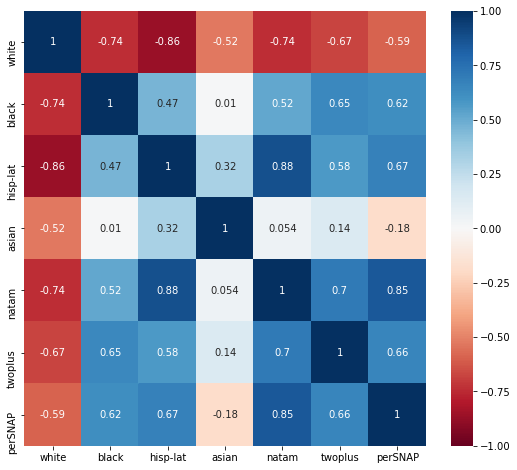

In [284]:
plt.figure(figsize=(9, 8))
sns.heatmap(racecorr, vmin=-1, vmax=1, cmap='RdBu', annot=True)